<a href="https://colab.research.google.com/github/Sagu12/all-projects/blob/master/FAKE_NEWS_CLASSIFIER_USING_DEEP_LEARNING_AND_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [23]:
df= pd.read_csv("/content/drive/My Drive/train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [0]:
#so we will be using the title to mainly classify the news as fake or not

In [0]:
df= df.dropna()

In [26]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [0]:
#getting the independent and dependent variables

In [0]:
X= df.drop("label", axis=1)

In [29]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [42]:
X.shape

(18285, 4)

In [0]:
y= df.label

In [32]:
y.shape

(18285,)

In [33]:
tf.__version__

'2.2.0'

In [0]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.text import one_hot

In [0]:
#giving the vocabulary size or the dictionary size

voc_size= 5000

In [0]:
#One hot representation

In [0]:
messages= X.copy()

In [38]:
messages.head(15)

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi..."
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi..."
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that..."
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...


In [0]:
messages.reset_index(inplace=True)

In [40]:
messages.head(15)

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi..."
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi..."
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that..."
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...


In [0]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download("popular")


In [45]:
#DATA PREPROCESSING
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
corpus=[]
for i in range(0,len(messages)):
  print(i)
  review= re.sub("[^a-zA-Z]", " ", messages["title"][i])
  review= review.lower()
  review= review.split()
  review= [ps.stem(word) for word in review if not word in stopwords.words("english")]
  review= " ".join(review)
  corpus.append(review)


Streaming output truncated to the last 5000 lines.
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
13443
1

In [47]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [50]:
onehot_repr= [one_hot(words, voc_size) for words in corpus]
onehot_repr[0]

[4963, 2032, 2111, 1534, 4055, 1604, 840, 3526, 2403, 4367]

In [0]:
#embedding representation

In [0]:
sent_length= 20
embedded_docs= pad_sequences(onehot_repr, padding="pre", maxlen=sent_length)

In [55]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 4963,
       2032, 2111, 1534, 4055, 1604,  840, 3526, 2403, 4367], dtype=int32)

In [0]:
#in the above part we have added padding to equalise the size of the sentences by adding zeros 

In [0]:
#creating model

In [78]:
embedding_vector_features= 40
model= Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length= sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
dropout (Dropout)            (None, 20, 40)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [0]:
#creating x and y numpy arrays

In [0]:
import numpy as np

In [0]:
X_final= np.array(embedded_docs)
y_final= np.array(y)

In [82]:
X_final.shape, y_final.shape

((18285, 20), (18285,))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test= train_test_split(X_final, y_final, test_size=0.3, random_state=10)

In [0]:
#model training

In [86]:
model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=10, batch_size=64)

Epoch 1/10
200/200 [==============================] - 3s 15ms/step - loss: 0.3485 - accuracy: 0.8323 - val_loss: 0.1935 - val_accuracy: 0.9147
Epoch 2/10
200/200 [==============================] - 3s 14ms/step - loss: 0.1524 - accuracy: 0.9387 - val_loss: 0.1859 - val_accuracy: 0.9220
Epoch 3/10
200/200 [==============================] - 3s 13ms/step - loss: 0.1088 - accuracy: 0.9596 - val_loss: 0.1945 - val_accuracy: 0.9189
Epoch 4/10
200/200 [==============================] - 3s 13ms/step - loss: 0.0807 - accuracy: 0.9728 - val_loss: 0.2100 - val_accuracy: 0.9240
Epoch 5/10
200/200 [==============================] - 3s 13ms/step - loss: 0.0550 - accuracy: 0.9812 - val_loss: 0.2468 - val_accuracy: 0.9182
Epoch 6/10
200/200 [==============================] - 3s 13ms/step - loss: 0.0377 - accuracy: 0.9866 - val_loss: 0.2948 - val_accuracy: 0.9196
Epoch 7/10
200/200 [==============================] - 3s 13ms/step - loss: 0.0302 - accuracy: 0.9902 - val_loss: 0.2922 - val_accuracy: 0.9127

In [0]:
#performance and accuracy

In [96]:
y_test

array([0, 0, 1, ..., 1, 0, 0])

In [99]:
y_pred= model.predict_classes(X_test)

#this method is used to predict the classes

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [103]:
y_pred[0]

array([0], dtype=int32)

In [0]:
from sklearn.metrics import confusion_matrix

In [102]:
cm= confusion_matrix(y_test,y_pred)
cm

array([[2844,  256],
       [ 227, 2159]])

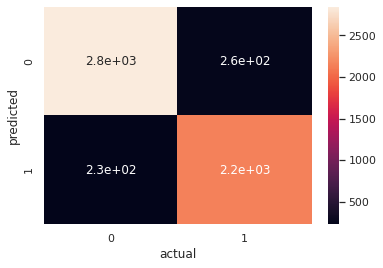

In [104]:
sns.heatmap(cm, annot=True)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

In [107]:
val_loss, val_acc = model.evaluate(X_test,y_test)


172/172 [==============================] - 1s 4ms/step - loss: 0.4093 - accuracy: 0.9120


In [0]:
from sklearn.metrics import classification_report, accuracy_score

In [109]:
accuracy_score(y_test, y_pred)

0.9119577105359096

In [110]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.93      0.92      0.92      3100\n           1       0.89      0.90      0.90      2386\n\n    accuracy                           0.91      5486\n   macro avg       0.91      0.91      0.91      5486\nweighted avg       0.91      0.91      0.91      5486\n'